In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd

In [13]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table

Measurement = Base.classes.measurement 

Station = Base.classes.station 

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
#Select date , tobs from measurement 
results = session.query(Measurement.date, Measurement.tobs).all()
pd.DataFrame(results)


,date,tobs
0,2010-01-01,65.0
1,2010-01-02,63.0
2,2010-01-03,74.0
3,2010-01-04,76.0
4,2010-01-06,73.0
...,...,...
19545,2017-08-19,71.0
19546,2017-08-20,78.0
19547,2017-08-21,76.0
19548,2017-08-22,76.0


In [20]:
# practice showing sum prcp of each station 
results = session.query(Measurement.station,
                        func.min(Measurement.tobs), 
                        func.max(Measurement.tobs),
                        func.sum(Measurement.prcp))\
.group_by(Measurement.station)\
.filter(Measurement.date >'2016-08-23')\
.order_by(func.sum(Measurement.prcp).desc())\
.all()
# pd.DataFrame(results)
results

[('USC00516128', 58.0, 82.0, 147.11000000000004),
 ('USC00519281', 59.0, 83.0, 68.24000000000002),
 ('USC00513117', 61.0, 82.0, 48.36000000000003),
 ('USC00519523', 60.0, 85.0, 37.99),
 ('USC00514830', 63.0, 83.0, 33.19),
 ('USC00519397', 60.0, 87.0, 16.089999999999986),
 ('USC00517948', 62.0, 87.0, 4.59)]

# Exploratory Climate Analysis

In [42]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results

precipitation_12 = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-23').order_by((Measurement.date).asc()).all()

pd.DataFrame(precipitation_12)

# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df = pd.DataFrame(precipitation_12, columns = ['date', 'prcp'])
prcp_df



,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


Text(0, 0.5, 'Precipitation (Inches)')

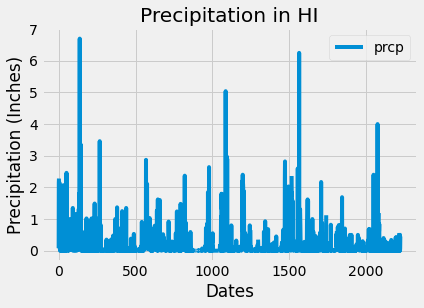

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title = 'Precipitation in HI')
plt.xlabel(f"Dates")
plt.ylabel(f"Precipitation (Inches)")


In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [51]:
# Design a query to show how many stations are available in this dataset?
available_sta = session.query(Station.station).count()
available_sta

9

In [53]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
most_active_station = active_stations[0][0]
most_active_station

'USC00519281'

In [58]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station_data = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs)\
                                   ,func.avg(Measurement.tobs).filter(Measurement.station == most_active_station)).all()
most_active_station_data

[(53.0, 87.0, 71.66378066378067)]

In [62]:
# Choose the station with the highest number of temperature observations.
highest_temp_obs = session.query(Measurement.station, func.count(Measurement.tobs))\
                                .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
highest_temp_obs

('USC00519281', 2772)

In [68]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
high_station_temp_obs = session.query(Measurement.tobs).filter(Measurement.date > 2016-08-23)\
        .filter(Measurement.station == highest_temp_obs).all()

SyntaxError: invalid token (<ipython-input-68-462da9b1c680>, line 2)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
